In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split

from sklearn.metrics.pairwise import distance_metrics

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, RocCurveDisplay, auc

from joblib import dump

import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE


In [59]:
data = pd.read_csv('../../../DATA/Concatination_of_ters/Without_Индекс стоимости жизни/classes.csv').dropna()


In [60]:
X, y = data.drop('Средняя численность работников, включая внешних совместителей',
                 axis=1), data['Средняя численность работников, включая внешних совместителей']
X_balanced, y_balanced = SMOTE().fit_resample(X, y)


In [61]:
X_balanced['Средняя численность работников, включая внешних совместителей'] = y_balanced


In [62]:
data_smoted = X_balanced

# WO Smoted

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data.drop('Средняя численность работников, включая внешних совместителей', axis=1),
                                                    data['Средняя численность работников, включая внешних совместителей'], test_size=0.5, random_state=42)


In [51]:
x = list(distance_metrics().keys())
x.remove('precomputed')
x

['cityblock',
 'cosine',
 'euclidean',
 'haversine',
 'l2',
 'l1',
 'manhattan',
 'nan_euclidean']

In [52]:
knn_optimal_n_neighbors = GridSearchCV(KNeighborsClassifier(),
                                             {'n_neighbors': np.arange(1, 13, 2),
                                              'weights': ['uniform', 'distance'],
                                              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                                              'leaf_size': np.arange(1, 6, 1),
                                              'p': np.arange(1, 10, 1),
                                              'metric': x
                                              },
                                              scoring='recall',
                                             cv=4,
                                             n_jobs=4,
                                             ).fit(X_train, y_train)
knn_optimal_n_neighbors.best_params_


c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
12960 fits failed out of a total of 51840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py", line 215, in fit
    return self._fit(X, y)
  File "c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklea

{'algorithm': 'ball_tree',
 'leaf_size': 1,
 'metric': 'cityblock',
 'n_neighbors': 1,
 'p': 1,
 'weights': 'uniform'}

In [53]:
y_predicted = knn_optimal_n_neighbors.predict(X_test)


In [54]:
print(confusion_matrix(y_test, y_predicted))


[[36  7]
 [ 7 12]]


In [55]:
print(classification_report(y_test, y_predicted))


              precision    recall  f1-score   support

       False       0.84      0.84      0.84        43
        True       0.63      0.63      0.63        19

    accuracy                           0.77        62
   macro avg       0.73      0.73      0.73        62
weighted avg       0.77      0.77      0.77        62



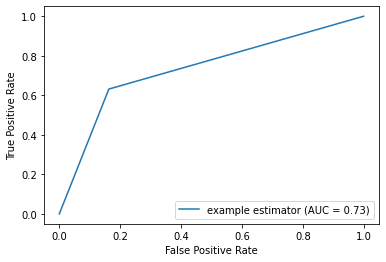

In [56]:
fpr, tpr, thresholds = roc_curve(y_predicted, y_test)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()


# W Smoted

In [63]:
X_train_smoted, X_test_smoted, y_train_smoted, y_test_smoted = train_test_split(data_smoted.drop('Средняя численность работников, включая внешних совместителей', axis=1),
                                                    data_smoted['Средняя численность работников, включая внешних совместителей'], test_size=0.5, random_state=42)


In [64]:
knn_optimal_n_neighbors = GridSearchCV(KNeighborsClassifier(),
                                             {'n_neighbors': np.arange(1, 13, 2),
                                              'weights': ['uniform', 'distance'],
                                              'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                                              'leaf_size': np.arange(1, 6, 1),
                                              'p': np.arange(1, 10, 1),
                                              'metric': x
                                              },
                                              scoring='recall',
                                             cv=4,
                                             n_jobs=4,
                                       ).fit(X_train_smoted, y_train_smoted)
knn_optimal_n_neighbors.best_params_


c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py:378: FitFailedWarning: 
12960 fits failed out of a total of 51840.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2160 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\model_selection\_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\neighbors\_classification.py", line 215, in fit
    return self._fit(X, y)
  File "c:\Users\Mike\AppData\Local\Programs\Python\Python39\lib\site-packages\sklea

{'algorithm': 'brute',
 'leaf_size': 1,
 'metric': 'cosine',
 'n_neighbors': 3,
 'p': 1,
 'weights': 'distance'}

In [65]:
y_predicted = knn_optimal_n_neighbors.predict(X_test_smoted)


In [66]:
print(confusion_matrix(y_test_smoted, y_predicted))


[[30 11]
 [ 6 41]]


In [67]:
print(classification_report(y_test_smoted, y_predicted))


              precision    recall  f1-score   support

       False       0.83      0.73      0.78        41
        True       0.79      0.87      0.83        47

    accuracy                           0.81        88
   macro avg       0.81      0.80      0.80        88
weighted avg       0.81      0.81      0.81        88



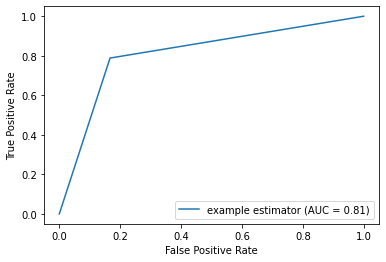

In [68]:
fpr, tpr, thresholds = roc_curve(y_predicted, y_test_smoted)
roc_auc = auc(fpr, tpr)
display = RocCurveDisplay(
    fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='example estimator')
display.plot()
